In [14]:
# Import Necessary Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Load and Explore Data
df = pd.read_csv(r"C:\Users\Sosa the chief\Desktop\python\portfolio\Sales forecasting\train.csv")

print("Initial NaN count in each column:")
print(df.isna().sum())
df.dropna(subset=['Postal Code'], inplace=True)

if df['Postal Code'].isnull().sum() == 0:
    print("All NaN values have been removed from the PostalCode column.")
else:
    print("There are still NaN values in the PostalCode column.")
    
print(df.head())


Initial NaN count in each column:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64
All NaN values have been removed from the PostalCode column.
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country 

In [23]:
# Check for NaN values in the DataFrame
print("Checking for NaN values in the dataset:")
print(df.isna().sum())

Checking for NaN values in the dataset:
Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
dtype: int64


In [24]:
# Drop irrelevant columns, ignoring any that are not found in the DataFrame
columns_to_drop = ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Country', 'Product Name']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Display the first few rows of the cleaned dataset
print("Dataset after dropping irrelevant columns:")
print(df.head())

# Inspect unique values for categorical columns
categorical_columns = ['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category']
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Dataset after dropping irrelevant columns:
   Order Date   Ship Date       Ship Mode    Segment             City  \
0  08/11/2017  11/11/2017    Second Class   Consumer        Henderson   
1  08/11/2017  11/11/2017    Second Class   Consumer        Henderson   
2  12/06/2017  16/06/2017    Second Class  Corporate      Los Angeles   
3  11/10/2016  18/10/2016  Standard Class   Consumer  Fort Lauderdale   
4  11/10/2016  18/10/2016  Standard Class   Consumer  Fort Lauderdale   

        State  Postal Code Region         Category Sub-Category     Sales  
0    Kentucky      42420.0  South        Furniture    Bookcases  261.9600  
1    Kentucky      42420.0  South        Furniture       Chairs  731.9400  
2  California      90036.0   West  Office Supplies       Labels   14.6200  
3     Florida      33311.0  South        Furniture       Tables  957.5775  
4     Florida      33311.0  South  Office Supplies      Storage   22.3680  

Unique values in 'Ship Mode':
['Second Class' 'Standard Class

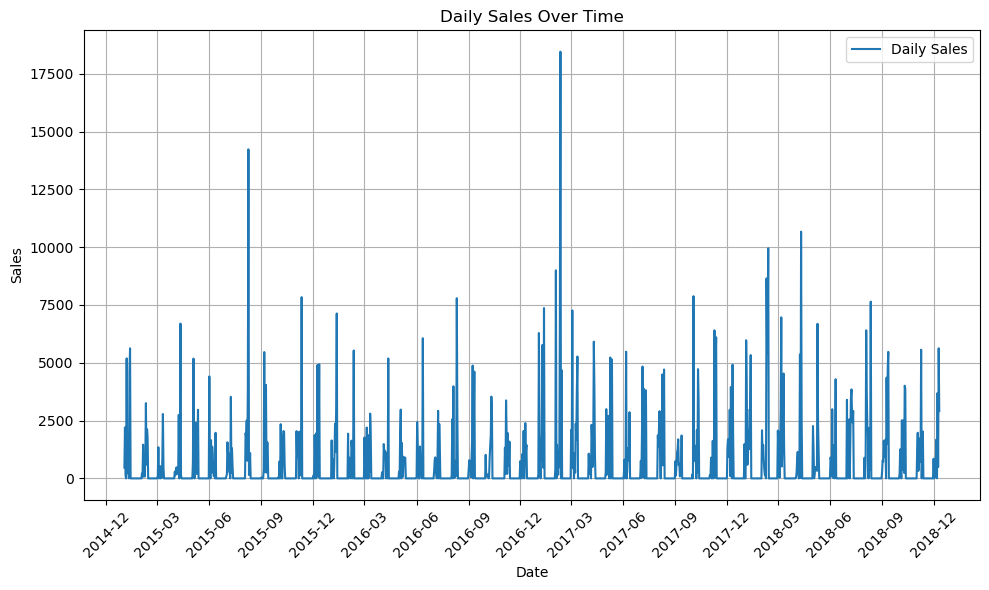

The highest sales occurred on 2017-02-10 00:00:00 with a value of 18452.972.


In [17]:
# Plot the daily sales
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales['Sales'], label='Daily Sales')

# Set title and labels
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')

# Reduce the number of x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3rd month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as 'YYYY-MM'

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid and legend
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Find the date and value of the highest sales
max_sales_date = daily_sales['Sales'].idxmax()  # Get the index (date) of the maximum sales
max_sales_value = daily_sales['Sales'].max()    # Get the maximum sales value

# Print the results
print(f"The highest sales occurred on {max_sales_date} with a value of {max_sales_value}.")

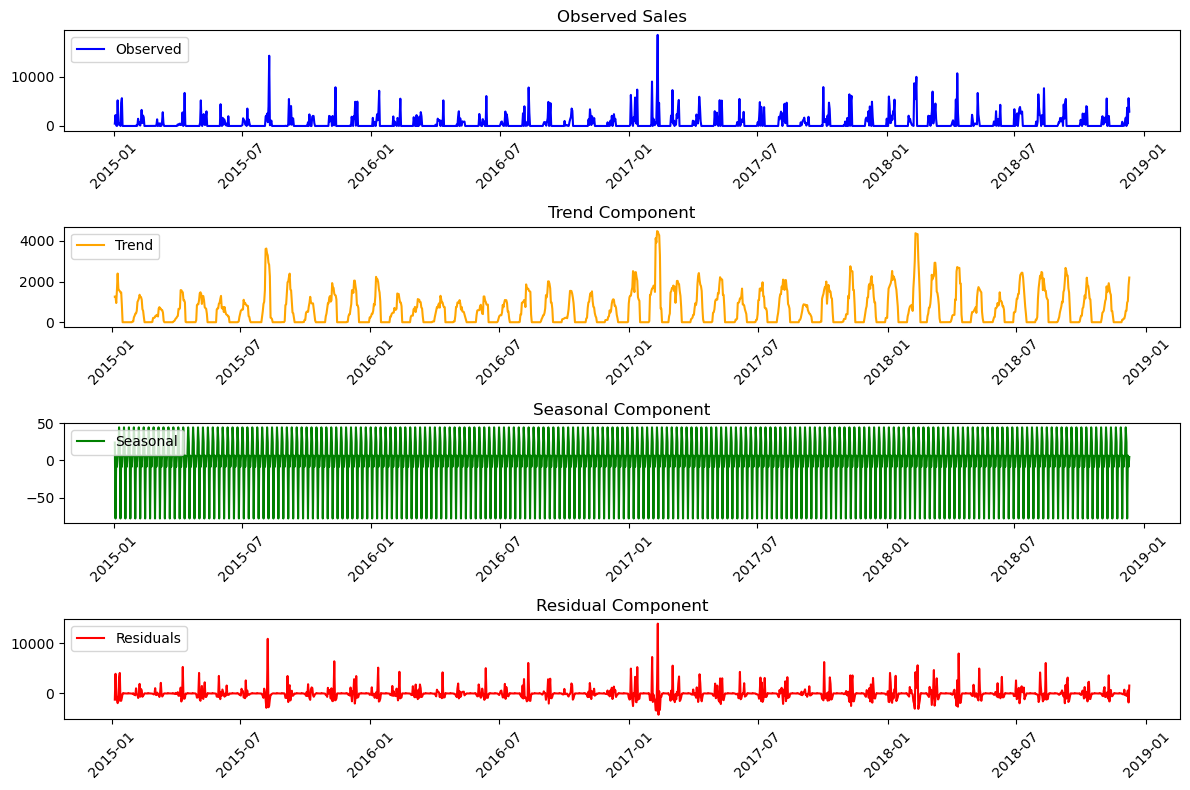

In [13]:
# Ensure the daily_sales DataFrame has a DateTimeIndex
daily_sales.index = pd.to_datetime(daily_sales.index)

# Ensure data is sorted by date (important for time series analysis)
daily_sales = daily_sales.sort_index()

# Seasonal decomposition on daily data
decomposition = seasonal_decompose(daily_sales['Sales'], model='additive', period=7)  # 7-day period for weekly seasonality

# Plot decomposed components
plt.figure(figsize=(12, 8))

# Observed data
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.title('Observed Sales')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

# Trend
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

# Residuals
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [25]:
# Perform the Augmented Dickey-Fuller test
result = adfuller(daily_sales['Sales'])

# Extract the ADF statistic and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the ADF test results
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)

# Interpretation of the result
if p_value < 0.05:
    print("The p-value is less than 0.05, so we reject the null hypothesis. The data is stationary; This means the time series does not have a unit root and is stable over time.")
else:
    print("The p-value is greater than or equal to 0.05, so we fail to reject the null hypothesis. The data is not stationary; This means the time series has a unit root, indicating trends, seasonality, or other structures that change over time.")

ADF Statistic: -12.1112273120126
p-value: 1.917306516506545e-22
The p-value is less than 0.05, so we reject the null hypothesis. The data is stationary; This means the time series does not have a unit root and is stable over time.


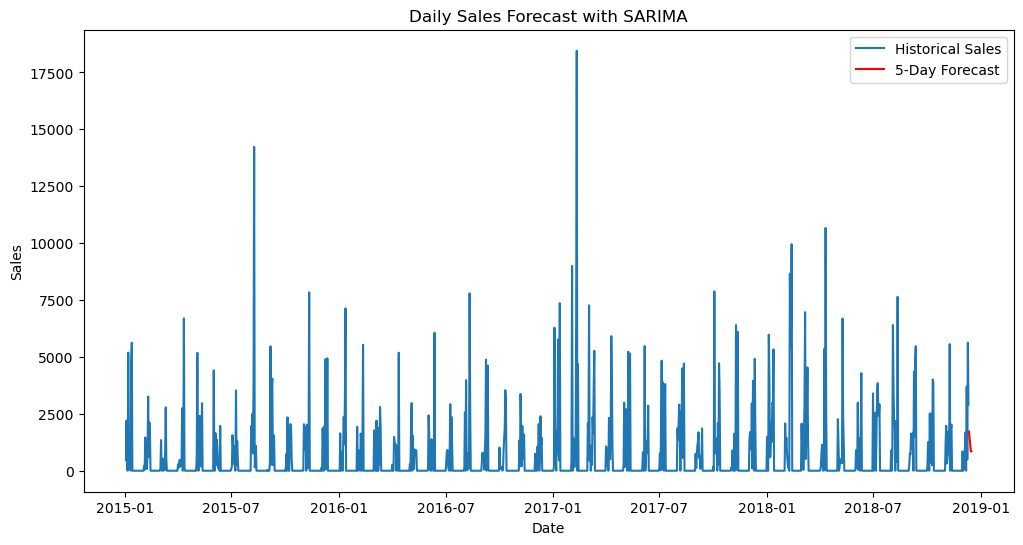

5-Day Forecasted Sales:
            Forecasted Sales
Date                        
2018-12-12       1715.537935
2018-12-13       1397.843482
2018-12-14       1174.931486
2018-12-15        842.418615
2018-12-16        853.727305


In [19]:
# Set up and fit the SARIMA model
model = SARIMAX(daily_sales['Sales'],
                order=(1, 0, 1),            # Adjust (p, d, q) as needed, `d=0` if data is stationary
                seasonal_order=(1, 1, 1, 7),  # Weekly seasonality (P, D, Q, 7)
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
sarima_result = model.fit(disp=False)

# Forecast for the next 5 days
forecast = sarima_result.get_forecast(steps=5)
forecast_index = pd.date_range(daily_sales.index[-1] + pd.Timedelta(days=1), periods=5, freq='D')
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean}, index=forecast_index)

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Sales'], label='Historical Sales')
plt.plot(forecast_df, label='5-Day Forecast', color='red')
plt.title('Daily Sales Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# Assuming daily_sales is your DataFrame with 'Order Date' as index and 'Sales' column

# Prepare data as before (filling NaNs with the average)
average_sales = daily_sales['Sales'].mean()
daily_sales['Sales'] = daily_sales['Sales'].fillna(average_sales)

# Set up and fit the SARIMA model
model = SARIMAX(daily_sales['Sales'],
                order=(1, 0, 1),            # Adjust (p, d, q) as needed
                seasonal_order=(1, 1, 1, 7),  # Weekly seasonality (P, D, Q, 7)
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
sarima_result = model.fit(disp=False)

# Forecast for the next 5 days
forecast = sarima_result.get_forecast(steps=5)
forecast_index = pd.date_range(daily_sales.index[-1] + pd.Timedelta(days=1), periods=5, freq='D')

# Create a DataFrame to display forecasted values
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted Sales': forecast.predicted_mean
}).set_index('Date')

# Display the forecasted values
print("5-Day Forecasted Sales:")
print(forecast_df)
